## OP Learning Agenda: SF Class of 2014

A project to determine what, if anything, influenced the graduation success of the San Francisco class of 2014.

### Abstract

The SF Class of 2014 is currently the highest performing CT class in terms of 5 year college graduation rate. They almost certainly will be have the 6 year graduation rate at the end of FY20. This report investigated what variables might have influenced this classes success, and if any of those indicators are something which could be encouraged at other CT sites. 

While it is true the Class of 2014 will have the highest graduation rate, almost more notable is the jump in graduation rates from 2012 to 2013. In some senses, the class of 2014 was just continuing the impressive results their seniors started. However, given the small sample sizes for any given College Track cohort, it is difficult to draw conclusions on the statistical significance of these increases. In fact, looking at the t-test results indicated that the difference in graduation rates could not be considered pure randomness. 

That being said, it still is important to understand if any factors seemed different among these students that might have had a correlation with graduation rates. When considering the data available, 11th grade GPA and first year of College GPA seemed to play the most important role in graduation success.  

Other factors considered, but yield mixed or negligible results include: 
* First Gen Status
* Low Income
* Ethnic Background
* ACT scores
* High School Attended* 
* College Fit Type
* High School Attrition
* High School Retention

\* For high school attended, there was a positive correlation with students who attended Lowell High School

Finally, the switch to site based advising occurred around this time. This is a harder indicator to effectively measure, but the results did indicate there *could* be something to this, but it is currently too difficult to pin down the extent of the significance. 




In [1]:
import pandas as pd
from pathlib import Path
from datetime import datetime
import statsmodels.api as sm
import numpy as np
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')



In [2]:
%matplotlib inline

In [3]:
today = datetime.today()
in_file = Path.cwd() / "data" / "processed" / "processed_data.pkl"
report_dir = Path.cwd() / "reports"
report_file = report_dir / "Excel_Analysis_{today:%b-%d-%Y}.xlsx"

in_file2 = Path.cwd() / "data" / "processed" / "processed_data_file2.pkl"

in_file3 = Path.cwd() / "data" / "processed" / "processed_data_file3.pkl"

In [50]:
df = pd.read_pickle(in_file)

df2 = pd.read_pickle(in_file2)

df3 = pd.read_pickle(in_file3)

In [51]:
# original df file only included students who completed hs program. later removed that filter,
#so changing df to be the original subset, and df_master to be the whole group

df_master = df

df = df[df.indicator_completed_ct_hs_program == True]

In [6]:
def sf_cross_tab(df, column, normalize="index", margins=True):
    return pd.crosstab(
        df[df.site == "San Francisco"].high_school_class,
        df[df.site == "San Francisco"][column],
        normalize=normalize,
        margins=margins,
    )

In [7]:
def class_cross_tab(df, column, hs_class, normalize="index"):
    return pd.crosstab(
        df[df.high_school_class == hs_class].site,
        df[df.high_school_class == hs_class][column],
        normalize=normalize,
        margins=True,
    )

In [8]:
# creating a subset df that is just San Francisco
df_sub = df[df.site == "San Francisco"]

df_sub = df_sub[df_sub.high_school_class<=2014]

##  General Distributions

SF Class of 2014 is on track to have the highest 6 year grad rate, with almost 70% of students already graduating, but that number isn't significantly higher than the class of 2013. Though we do see a reasonably big jump from 2012 to 2013. 



#### Table 1. San Francisco 6 Year Graduation Rate by High School Class 

In [132]:
# Grad Rate Less than 6 years

grad_rate_6_year = sf_cross_tab(
    df, "graduated_4_year_degree_less_6_years").round(2)

grad_rate_6_year.round(2).style.format('{:.0%}')

graduated_4_year_degree_less_6_years,False,True
high_school_class,,
2011,53%,47%
2012,45%,55%
2013,32%,68%
2014,30%,70%
2015,61%,39%
All,45%,55%


#### Table 2. San Francisco 6 Year Graduation Count by High School Class 


In [134]:
grad_numbers_6_year = sf_cross_tab(df, "graduated_4_year_degree_less_6_years", normalize=False).round(2)

grad_numbers_6_year

graduated_4_year_degree_less_6_years,False,True,All
high_school_class,,,
2011,18,16,34
2012,19,23,42
2013,12,25,37
2014,16,37,53
2015,35,22,57
All,100,123,223


#### Table 3. San Francisco 5 Year Graduation Rate by High School Class

To be more accurate, we can look at the 5 year grad rate, but this tells essentially the same story.

In [135]:
grad_rate_5_year = sf_cross_tab(df, "graduated_4_year_degree_less_5_years").round(2)

grad_rate_5_year.round(2).style.format('{:.0%}')


graduated_4_year_degree_less_5_years,False,True
high_school_class,,
2011,53%,47%
2012,48%,52%
2013,32%,68%
2014,30%,70%
2015,61%,39%
All,45%,55%


### Statistical Test

If we run an independent t-test on the 5 year graduation rates, we see that the class of 2014 is not statistically higher than the class of 2013, nor is the class of 2013 statistically higher than the class of 2012.

#### P Value from t-test comparing 2014 -> 2013

In [12]:
population1_test_1 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2013)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_1 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2014)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [13]:
# p value of independent t-test on populations above
print("p Value: ", (round(sm.stats.ttest_ind(population1_test_1, population2_test_1)[1], 2)))

p Value:  0.82


#### P Value from t-test comparing 2013 -> 2012 


In [14]:
population1_test_2 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2012)][
        "graduated_4_year_degree_less_5_years"
    ]
).values


population2_test_2 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2013)][
        "graduated_4_year_degree_less_5_years"
    ]
).values

In [15]:
print(" p Value: ",(round(sm.stats.ttest_ind(population1_test_2, population2_test_2)[1], 2)))

 p Value:  0.17


### Other Distributions

Based on the above results, I don't believe we can say that the class of 2014 was notably higher that previous classes. It does however appear there is an upswing in graduation rate that has been increasing since 2011, with a decent jump from 2012 -> 2013 (though not a statistically significant one).

With that in mind, here are other notable differences in the high school class distributions which might indicate changes that are influencing the graduation rate 

#### 11th Grade College Eligibility GPA

This is the most notable distribution change, with the class of 2014 and 2013 having higher GPAs than the previous classes. The class of 2014 had almost 75% of students with a GPA above 3.0, and the class of 2013 had 54% of student above 3.0. Compared to 45% for the class of 2012.

In [136]:
gpa_buckets = sf_cross_tab(df, "11th_grade_gpa_bucket", margins=False ).round(2)



gpa_buckets.round(2).style.format('{:.0%}')

11th_grade_gpa_bucket,2.5 - 2.74,2.5 or less,2.75 - 2.9,3.0 - 3.49,3.5 or greater,NULL
high_school_class,,,,,,
2011,6%,24%,12%,12%,21%,26%
2012,2%,21%,10%,21%,24%,21%
2013,19%,14%,14%,24%,30%,0%
2014,9%,13%,4%,25%,49%,0%
2015,7%,11%,12%,30%,35%,5%


#### Pearson Correlation Coefficient for key continuous data points (SF - all classes)

Below is the correlation matrix for key continuous variables that might influence college graduation. For the purposes here, only the first column is displays relevant information. 

We can see that GPA in general plays the largest factor, with 11th grade and the first year of college particularly important. Bank book earnings played the had the second highest correlation to graduation success. 

Note - there are no notable differences between the Pearson Coefficient and the Spearman Coefficient


In [137]:
# cleaning up column types (needs to be moved to data prep)

# changing act_math to an int
df['act_mathematics'] = pd.to_numeric(df['act_mathematics'], errors='coerce')

# changing bank book earnings to an int
df['total_bb_earnings_as_of_hs_grad'] = df['total_bb_earnings_as_of_hs_grad'].replace(
    '[\$,]', '', regex=True).astype(float)

# changing gpa data to int
df[['9th_grade', '10th_grade', '11th_grade',
    '12th_grade', 'year_1', 'year_2', 'year_3',
    'year_4', 'year_5', 'year_6']] = df[
    ['9th_grade', '10th_grade', '11th_grade',
    '12th_grade', 'year_1', 'year_2', 'year_3',
    'year_4', 'year_5', 'year_6']].apply(pd.to_numeric, errors='coerce')

In [11]:
corrMatrix = df_sub[['graduated_4_year_degree_less_5_years', '9th_grade', '10th_grade', '11th_grade',
                     '12th_grade', 'year_1', 'year_2', 'year_3',
                     'year_4', 'year_5', 'indicator_first_generation', 'indicator_low_income',
                     'total_bb_earnings_as_of_hs_grad', 'act_mathematics', 'original_incoming_cohort?']].corr(method='pearson')

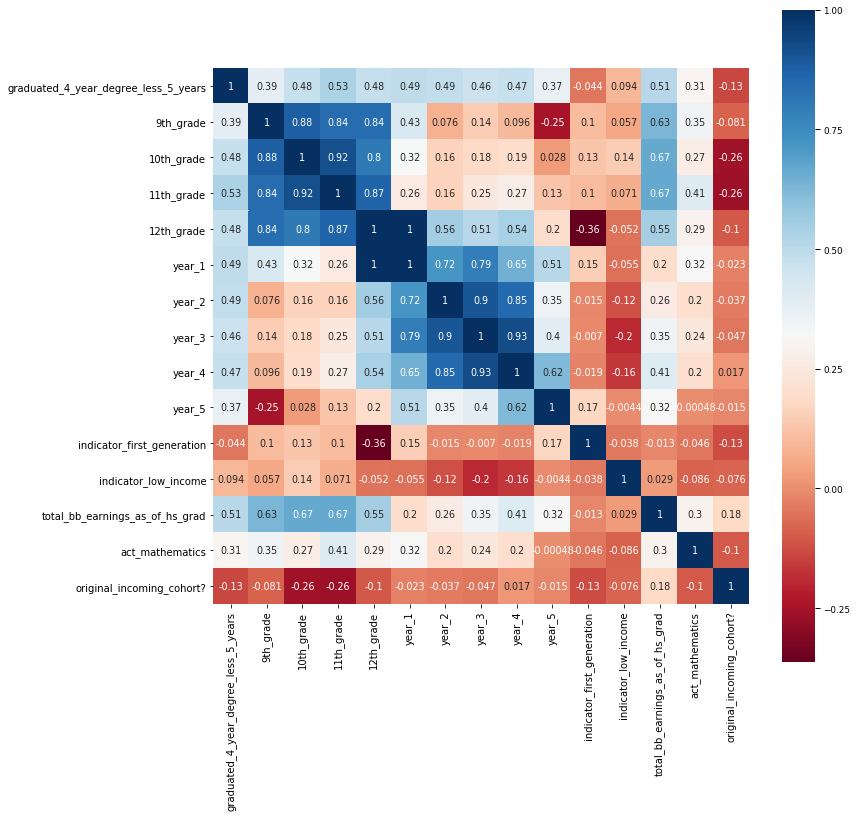

In [12]:
f, ax = plt.subplots(figsize=(12, 12))
sns.set_context('paper')


ax = sns.heatmap(corrMatrix, vmax=1, square=True, annot=True,  cmap="RdBu")


#### Logistic Regression on Categorical Variables (All SF Classes)

Based on the above correlations, it is important to evaluate if any categorical variables are also influencing graduation outcomes. Below are the logistic regression results for selected categorical variables with the notable continuous variables added to the model as well. 

Below is the logistic regression result on the following key categorical variables: 


* Ethnic Background

* College Fit type (using the fit type of the first school attended)

* First Generation 

* High School Attended



When performed on only San Francisco students, the results indicated that still only 11th Grade GPA and Year 1 GPA had a statistically significant influence on graduation success. None of the other categorical indicators were statistically significant. 


*For the high school test, the continuous variables had to be removed for the results to converge due to the large number of schools students attended* 



Only three high schools showed statistically significant values, Lowell, Balboa, and City Arts and Tech, with Lowell being the only one that had a positive influence on students. As a note, prior to this analysis I spoke with Miccaela Montague and she indicated this likely would be the case. 

As a note, for all of these the sample size was quite low.



In [15]:
def C1(cat):
     return pd.get_dummies(cat, drop_first=True)

In [44]:
mod = smf.logit(formula= "C1(graduated_4_year_degree_less_6_years) ~ year_1  + Q('11th_grade') + C(indicator_first_generation) + total_bb_earnings_as_of_hs_grad + (C(fit_type)-1) + C(ethnic_background)", data=df_sub).fit(method='bfgs', maxiter=100)
mod.summary()

Optimization terminated successfully.
         Current function value: 0.121799
         Iterations: 94
         Function evaluations: 107
         Gradient evaluations: 99


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      Logit Regression Results                                      
====================================================================================================
Dep. Variable:     C1(graduated_4_year_degree_less_6_years)   No. Observations:                   46
Model:                                                Logit   Df Residuals:                       35
Method:                                                 MLE   Df Model:                           10
Date:                                      Tue, 24 Mar 2020   Pseudo R-squ.:                  0.7674
Time:                                              16:57:00   Log-Likelihood:                -5.6028
converged:                                             True   LL-Null:                       -24.085
Covariance Type:                                  nonrobust   LLR p-value:                 5.740e-05
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                  -26.2643   5016.666     -0.005      0.996   -9858.749    9806.220
C(indicator_first_generation)[T.True]       -0.0611      2.341     -0.026      0.979      -4.650       4.527
C(fit_type)[T.Good Fit]                    -14.7130   5016.628     -0.003      0.998   -9847.123    9817.697
C(fit_type)[T.None]                        -13.5948   5016.628     -0.003      0.998   -9846.005    9818.816
C(ethnic_background)[T.Asian-American]      -6.6681      4.460     -1.495      0.135     -15.409       2.072
C(ethnic_background)[T.Latino / Chicano]     4.0663      6.752      0.602      0.547      -9.167      17.300
C(ethnic_background)[T.Multiracial]         -1.1977     68.897     -0.017      0.986    -136.233     133.838
C(ethnic_background)[T.Other]                     0   2.86e+08          0      1.000    -5.6e+08     5.6e+08
C(ethnic_background)[T.Pacific Islander]     3.6324   6876.918      0.001      1.000   -1.35e+04    1.35e+04
year_1                                       5.8800      2.933      2.005      0.045       0.132      11.628
Q('11th_grade')                              5.5164      3.086      1.788      0.074      -0.531      11.564
total_bb_earnings_as_of_hs_grad              0.0049      0.003      1.703      0.089      -0.001       0.011
============================================================================================================

Possibly complete quasi-separation: A fraction 0.37 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [92]:
mod = smf.logit(formula= "C1(graduated_4_year_degree_less_6_years) ~ C(school)", data=df_sub).fit(method='bfgs', maxiter=100)
mod.summary()

         Current function value: 0.459947
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      Logit Regression Results                                      
====================================================================================================
Dep. Variable:     C1(graduated_4_year_degree_less_6_years)   No. Observations:                  163
Model:                                                Logit   Df Residuals:                      132
Method:                                                 MLE   Df Model:                           30
Date:                                      Wed, 18 Mar 2020   Pseudo R-squ.:                  0.3106
Time:                                              14:30:15   Log-Likelihood:                -74.971
converged:                                            False   LL-Null:                       -108.75
Covariance Type:                                  nonrobust   LLR p-value:                 0.0001025
===============================================================================================================================================
                                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       0.8096      0.601      1.348      0.178      -0.368       1.987
C(school)[T.Archbishop Riordan High School]                                    16.8502   3946.457      0.004      0.997   -7718.064    7751.765
C(school)[T.Asawa (Ruth) San Francisco School Of The Arts, A Public School]   -28.8917    5.6e+05  -5.16e-05      1.000    -1.1e+06     1.1e+06
C(school)[T.Balboa High School]                                                -0.8049      1.014     -0.794      0.427      -2.792       1.182
C(school)[T.Bridgemont High School]                                           -15.8382   1834.126     -0.009      0.993   -3610.659    3578.982
C(school)[T.City Arts And Tech High School]                                    -1.6581      0.915     -1.812      0.070      -3.452       0.135
C(school)[T.Crystal Springs Uplands School]                                   -15.8382   1834.126     -0.009      0.993   -3610.659    3578.982
C(school)[T.Drew School]                                                        9.3556    161.196      0.058      0.954    -306.583     325.294
C(school)[T.El Camino High School]                                             -0.8101      1.537     -0.527      0.598      -3.822       2.201
C(school)[T.Galileo High School]                                               -0.4053      1.093     -0.371      0.711      -2.547       1.736
C(school)[T.Gateway High School]                                               -1.0326      0.765     -1.349      0.177      -2.533       0.468
C(school)[T.Immaculate Conception Academy]                                     -1.9089      1.302     -1.466      0.143      -4.460       0.643
C(school)[T.International Studies Academy]                                     -1.9089      1.302     -1.466      0.143      -4.460       0.643
C(school)[T.Jordan (June) School For Equity]                                    9.3556    161.196      0.058      0.954    -306.583     325.294
C(school)[T.KIPP Bridge Charter School]                                         0.0551      0.734      0.075      0.940      -1.383       1.493
C(school)[T.Leadership High School]                                           -15.8382   1834.126     -0.009      0.993   -3610.659    3578.982
C(school)[T.Liberty High School]                                              -15.8382   1834.126     -0.009      0.993   -3610.659    3578.982
C(school)[T.Lowell High School]                                                 0.9818      0.866      1.134      0.257      -0.715       2.679
C(school)[T.Marshal

#### Logistic Regression performed on all sites and classes

The first regression from above was performed again but using a much larger data set - all sites and classes - but the results were the same. Only Year 1 and 11th Grade GPA were significant. 

In [54]:
mod = smf.logit(formula= "C1(graduated_4_year_degree_less_6_years) ~ year_1  + Q('11th_grade') + C(indicator_first_generation) + total_bb_earnings_as_of_hs_grad + (C(fit_type)-1) + C(original_incoming_cohort)", data=df).fit(method='bfgs', maxiter=1000)
mod.summary()

Optimization terminated successfully.
         Current function value: 0.513517
         Iterations: 60
         Function evaluations: 75
         Gradient evaluations: 64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      Logit Regression Results                                      
====================================================================================================
Dep. Variable:     C1(graduated_4_year_degree_less_6_years)   No. Observations:                  437
Model:                                                Logit   Df Residuals:                      428
Method:                                                 MLE   Df Model:                            8
Date:                                      Tue, 24 Mar 2020   Pseudo R-squ.:                  0.2587
Time:                                              16:59:24   Log-Likelihood:                -224.41
converged:                                             True   LL-Null:                       -302.71
Covariance Type:                                  nonrobust   LLR p-value:                 8.177e-30
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -5.7123      0.971     -5.883      0.000      -7.615      -3.809
C(indicator_first_generation)[T.True]    -0.1365      0.312     -0.438      0.661      -0.747       0.474
C(fit_type)[T.Good Fit]                  -0.2517      0.512     -0.491      0.623      -1.256       0.752
C(fit_type)[T.Local Affordable]          -0.1325      1.354     -0.098      0.922      -2.787       2.522
C(fit_type)[T.None]                      -0.8280      0.551     -1.503      0.133      -1.908       0.252
C(original_incoming_cohort)[T.True]      -0.3389      0.264     -1.286      0.199      -0.856       0.178
year_1                                    1.3686      0.187      7.326      0.000       1.002       1.735
Q('11th_grade')                           0.8986      0.239      3.758      0.000       0.430       1.367
total_bb_earnings_as_of_hs_grad        2.365e-05   9.85e-05      0.240      0.810      -0.000       0.000
=========================================================================================================
"""

### San Francisco High School Attrition

Another possibility, is the classes of 2013 and 2014 has a lower percent of students who completed the High School program, which could mean only the most qualified students were included in our college graduation numbers. 

The below table list the percent of students who started college track and then completed the high school program. We do see in 2013 a smaller number, 26% of students completed the program, but that number quickly returned to 36% for the class of 2014. 

In [140]:
sf_cross_tab(df_master, "indicator_completed_ct_hs_program").round(2).style.format('{:.0%}')

indicator_completed_ct_hs_program,False,True
high_school_class,,
2011,56%,44%
2012,69%,31%
2013,74%,26%
2014,64%,36%
2015,58%,42%
All,65%,35%


### San Francisco High School Retention

Finally, we considered if the class of 2013 and 2014 had a higher percentage of backfill students, which could be an indication that higher performing students were later recruited. 

Below list the % of students who completed the HS program who were part of the original incoming cohort. We can see that the class of 2013 and 2014 had a slightly higher percentages of students who were part of the original cohort, but still a lower percentage than the class of 2011. Thus is seems unlikely that this was a strong influence. 

In [10]:
sf_cross_tab(df, "original_incoming_cohort?").round(2).style.format('{:.0%}')

original_incoming_cohort?,False,True
high_school_class,,
2011,29%,71%
2012,43%,57%
2013,35%,65%
2014,38%,62%
2015,37%,63%
All,37%,63%


## SF Compared to Other Sites

San Francisco piloted site based modeling for the class of 2013, and the rest of College Track transitioned to this model in for the class of 2014. 

This is a harder metric to evaluate given that starting in 2014 all sites received site based advising, so San Francisco only has one year of only their students receiving site advising - a difficult length of time to pin down. Moreover, as we move back in time data becomes more limited or inaccurate, which makes comparing sites graduation rates prior to any advising harder to do. 

Still, from this limited analysis it does appear there *could* be a correlation with San Francisco's switch to site based advising. 



#### Class of 2013 graduation rate compared to other CT Sites

This table shows the difference in graduation rate between SF class of 2013 and all other sites - that starting in 2013 were not using site based modeling (however starting in 2014 all sites were using this model).

We can see that SF has a higher graduation rate, and the p value indicates this is a statistically significant difference. 

In [141]:
class_cross_tab(df, "graduated_4_year_degree_less_6_years", hs_class=2013).round(2).style.format('{:.0%}')


graduated_4_year_degree_less_6_years,False,True
site,,
East Palo Alto,72%,28%
New Orleans,67%,33%
Oakland,51%,49%
San Francisco,32%,68%
All,56%,44%


In [123]:
population1_test_4 = (
    df[(df.site == "San Francisco") & (df.high_school_class == 2013)][
        "graduated_4_year_degree_less_6_years"
    ]
).values


population2_test_4 = (
    df[(df.site != "San Francisco") & (df.high_school_class == 2013)][
        "graduated_4_year_degree_less_6_years"
    ]
).values

In [124]:
print("p Value: ",(round(sm.stats.ttest_ind(population1_test_4, population2_test_4)[1], 5)))

p Value:  0.00088


#### Class of 2011 and 2012 graduation rate compared to other CT Sites

When comparing the class of 2011 and 2012 though, at the time when no sites were using site based advising, San Francisco did not have a statistically higher graduation rate. 

In [142]:
pd.crosstab(
        df[df.high_school_class <= 2012].site,
        df[df.high_school_class <= 2012]['graduated_4_year_degree_less_6_years'],
        normalize='index',
        margins=True,
    ).round(2).style.format('{:.0%}')

graduated_4_year_degree_less_6_years,False,True
site,,
East Palo Alto,59%,41%
New Orleans,68%,32%
Oakland,53%,47%
San Francisco,49%,51%
All,55%,45%


In [126]:
population1_test_5 = (
    df[(df.site == "San Francisco") & (df.high_school_class <= 2012)][
        "graduated_4_year_degree_less_6_years"
    ]
).values


population2_test_5 = (
    df[(df.site != "San Francisco") & (df.high_school_class <= 2012)][
        "graduated_4_year_degree_less_6_years"
    ]
).values

In [127]:
print("p Value: ", (round(sm.stats.ttest_ind(population1_test_5, population2_test_5)[1], 2)))

p Value:  0.19


#### Class of 2014 and 2015 graduation rate compared to other CT Sites

Finally when looking at the class of 2014 and 2015, when all sites were using site based advising, San Francisco still appears to have a higher graduation rate.

In [143]:
pd.crosstab(
        df[df.high_school_class >= 2014].site,
        df[df.high_school_class >= 2014]['graduated_4_year_degree_less_6_years'],
        normalize='index',
        margins=True,
    ).round(2).style.format('{:.0%}')

graduated_4_year_degree_less_6_years,False,True
site,,
Aurora,57%,43%
East Palo Alto,52%,48%
New Orleans,68%,32%
Oakland,53%,47%
San Francisco,46%,54%
All,54%,46%


In [129]:
population1_test_6 = (
    df[(df.site == "San Francisco") & (df.high_school_class >= 2014)][
        "graduated_4_year_degree_less_6_years"
    ]
).values


population2_test_6 = (
    df[(df.site != "San Francisco") & (df.high_school_class >= 2014)][
        "graduated_4_year_degree_less_6_years"
    ]
).values

In [130]:
print('p Value: ',(round(sm.stats.ttest_ind(population1_test_6, population2_test_6)[1], 2)))

p Value:  0.05


In [131]:
%%html

<script>
$(document).ready(function(){
    window.code_toggle = function() {
        (window.code_shown) ? $('div.input').hide(250) : $('div.input').show(250);
        window.code_shown = !window.code_shown
    }
    if($('body.nbviewer').length) {
        $('<li><a href="javascript:window.code_toggle()" title="Show/Hide Code"><span class="fa fa-code fa-2x menu-icon"></span><span class="menu-text">Show/Hide Code</span></a></li>').appendTo('.navbar-right');
        window.code_shown=false;
        $('div.input').hide();
    }
});
</script>


<style>

div.prompt {display:none}


h1, .h1 {
    font-size: 33px;
    font-family: "Trebuchet MS";
    font-size: 2.5em !important;
    color: #2a7bbd;
}

h2, .h2 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #2a7bbd; 
    
}


h3, .h3 {
    font-size: 10px;
    font-family: "Trebuchet MS";
    color: #5d6063; 
    
}

.rendered_html table {

    font-size: 14px;
}

.output_png {
  display: flex;
  justify-content: center;
}

.cell {
    padding: 0px;
}


</style>